# AerVis Single - Plot example
This notebook shows how to compare results of multiple timesteps.. 

In [1]:
# we begin by loading the aervis plotting module
import aervis.plotting as ap

AerVis 0.0.2
:: AerVis plotting imports complete ::


## Selecting a dataset
Next we can load an individual dataset by supplying the full path of our converted netCDF file into the AerData class. 
If your data is still in the pp file format, please refer to the covert tutorials first. 

In [2]:
dataset = ap.AerData('../../bk417a.nc')

## Selecting a variable (and getting help on functions)

Now we have a dataset, we want to chose which variables to plot. To do this we use the `.show_var` function of our class. To see what this we can use pythons `help` function

In [3]:
help(dataset.show_var)

Help on method show_var in module aervis.plotting.aerdataclass:

show_var(screen: bool = True, returnstr: bool = False) method of aervis.plotting.aerdataclass.AerData instance
    Show variables within the Dataset
    If available this includes the standard/long name and dims
    
    Arguments:
        screen: bool - print to screen
        returnstr: bool - returns the string for saving to a file..



In [4]:
# commented out for notebook presentability
# dataset.show_var()

## Default plotting of a variable
By default we plot in a two column format using the 'twilight' colourmap

model_level_number ('time', 'model_level_number', 'latitude', 'longitude')

    --- ONLY DISPLAYING A SINGLE model_level_number --- 
 
        The level currently selected is 0, To change this use the pseudolevel argument. 


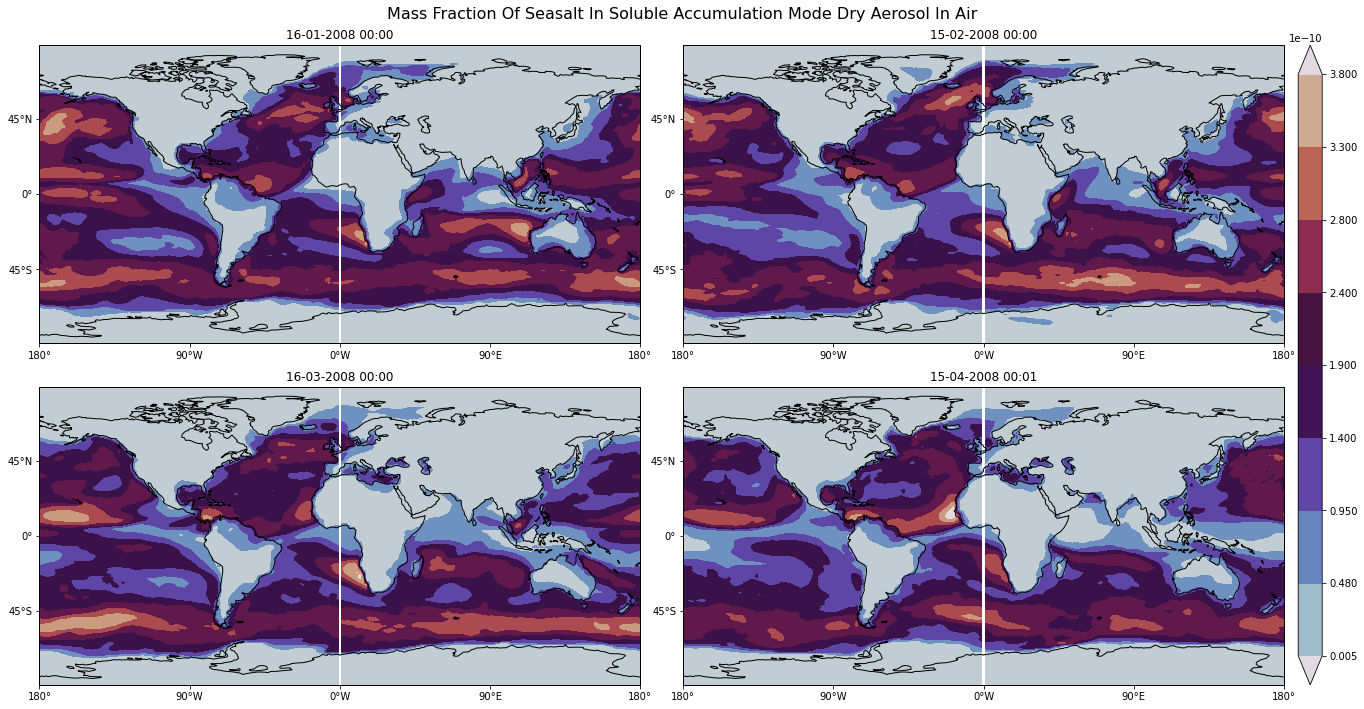

In [15]:
dataset.singleplot('m01s34i111')

## Tweaking Plot parameters
There are several plot parameter we can tweak at once. These can again be viewed using the help function

In [6]:
help(dataset.singleplot)

Help on method singleplot in module aervis.plotting.aerdataclass:

singleplot(what, **kwargs) method of aervis.plotting.aerdataclass.AerData instance
    A wrapper function for aervis.plotting.single.singleplot
    
    Arguments:
        what:str - The stash key variable name
    
    optional arguments:  
        level:int - the required level when dealing with pseudo or model_level
        t_steps:list - a list of selected timesteps in the same format as self.data.variables['time']
        figsize:tuple - figure size in inches
        col:int - number of columns in plot grid
        save:str - file name with path of where to save the figure. Enabling this does not show the figure on screen. 
              
        projection; - cartopy projection
        cmap:str - colourmap name
        vmin:float - manual min colourmap value
        vmax:float - manual max colourmap value
        discrete_cbar:bool - continuous or discrete colourbar values



### Selecting specific timesteps, changing the number of columns 
Here we select the last three timesteps, and plot them with a column format. 

In [7]:
# Out of interest, lets see what datetimes each time corresponds to
dataset.get_times(datetimedict=True)

{'01/16/08': masked_array(data=333456.,
              mask=False,
        fill_value=1e+20), '02/15/08': masked_array(data=334176.,
              mask=False,
        fill_value=1e+20), '03/16/08': masked_array(data=334896.,
              mask=False,
        fill_value=1e+20), '04/15/08': masked_array(data=335616.,
              mask=False,
        fill_value=1e+20)}

model_level_number ('time', 'model_level_number', 'latitude', 'longitude')

    --- ONLY DISPLAYING A SINGLE model_level_number --- 
 
        The level currently selected is 1, To change this use the pseudolevel argument. 


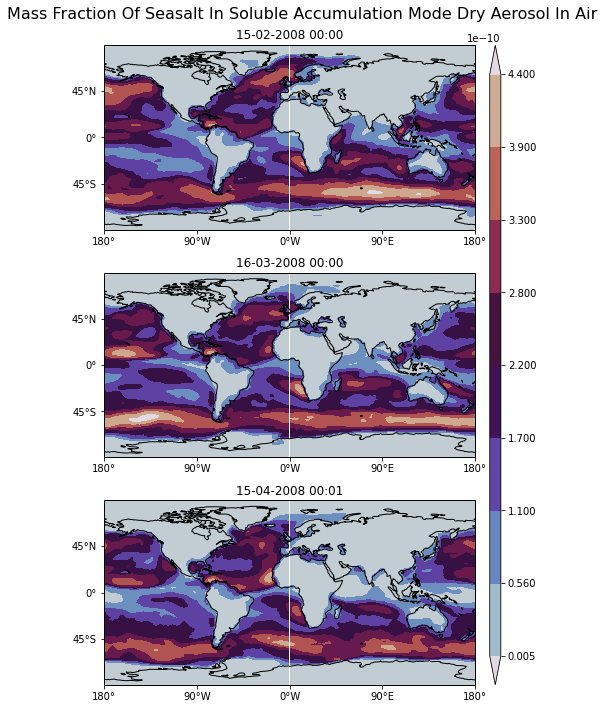

In [8]:
## get last three times
selected_times = dataset.get_times()[-3:]

## select the second model_level
nlevel = 1

## number of columns
ncol = 1


dataset.singleplot('m01s34i111',t_steps = selected_times, level=nlevel, col=ncol)

## Changing plot aesthetics
This time we can change the colourmap, and convert the colourbar into a continuous one instead of a discrete on. 
We shall also be viewing a different variable. 

Here you might notice, that since the afforementioned variable has a long name associated with it, the plot title is updated accordingly. 

model_level_number ('time', 'model_level_number', 'latitude', 'longitude')

    --- ONLY DISPLAYING A SINGLE model_level_number --- 
 
        The level currently selected is 0, To change this use the pseudolevel argument. 


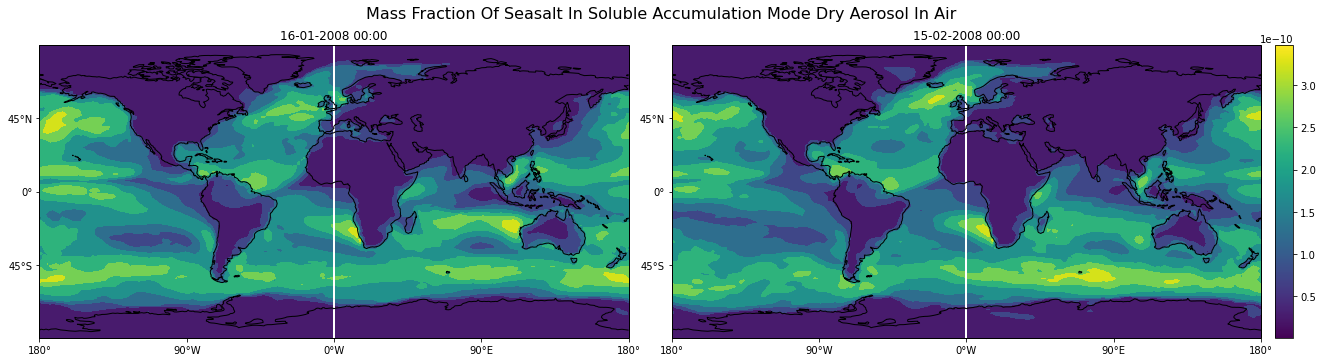

In [9]:
## new hash 
selection = 'm01s34i111'

# colourmap
newcmap = 'viridis'

# cbar 
discrete = False

#timesteps 
times = dataset.get_times()[0:2]

# fig size (x,y)
fs = (20,5) 

dataset.singleplot(selection, cmap = newcmap, discrete_cbar = discrete, t_steps = times , figsize = fs)

## Single Plot
Plotting a single timestep is also possible by selecting a single timestep. Here the number of columns automatically revert to 1 without the need for explicit specificaiton. 

To prevent an entirely dark map I will also adjust the colourmap thresholds with `vmin`

model_level_number ('time', 'model_level_number', 'latitude', 'longitude')

    --- ONLY DISPLAYING A SINGLE model_level_number --- 
 
        The level currently selected is 0, To change this use the pseudolevel argument. 


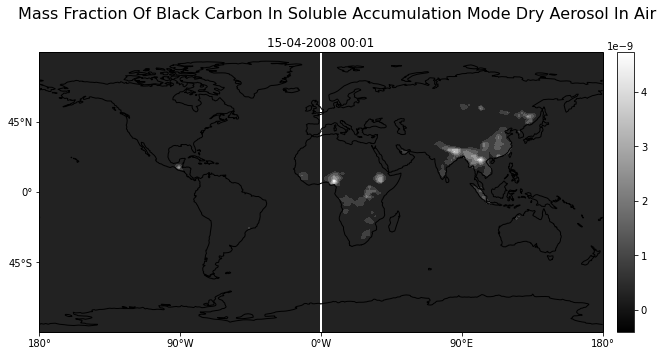

In [10]:
selection = 'm01s34i109'
newcmap = 'gist_gray'


## NOTE as times has to be a list, selecting one variable makes it a constant, 
# and therefore requires us to put square brackets around it again
times = [dataset.get_times()[3]]


dataset.singleplot(selection, cmap = newcmap, discrete_cbar = False,figsize=(20,5),t_steps=times,vmin=-40e-11)


## Advanced - replacing time varaibles for tiles where it does not exist

Some variables - e.g. altitude do not have a time variable. However we can still plot them by replacing how the plotting function handles time. 

In [11]:
selection = 'm01s34i111'

# lets view the dim names 
dataset.data.variables[selection]

<class 'netCDF4._netCDF4.Variable'>
float32 m01s34i111(time, model_level_number, latitude, longitude)
    _FillValue: nan
    long_name: mass_fraction_of_seasalt_in_soluble_accumulation_mode_dry_aerosol_in_air
    units: kg kg-1
    source: Data from Met Office Unified Model
    um_version: 11.1
    STASH: [  1  34 111]
    cell_methods: time: mean (interval: 1 hour)
    coordinates: surface_altitude height forecast_reference_time altitude level_height sigma forecast_period
unlimited dimensions: 
current shape = (4, 85, 144, 192)
filling on

In [12]:
level_name = 'model_level_number'

#### Here we see that we have 85 dimensions on model_level_number, so we select the first 20 in steps of 3
level_numbers = list(dataset.data.variables[level_name])[:22:3]
print(len(level_numbers))

# also select a single time to pass as level
ts = 3 # this is the value at dataset.get_times()[3]


8


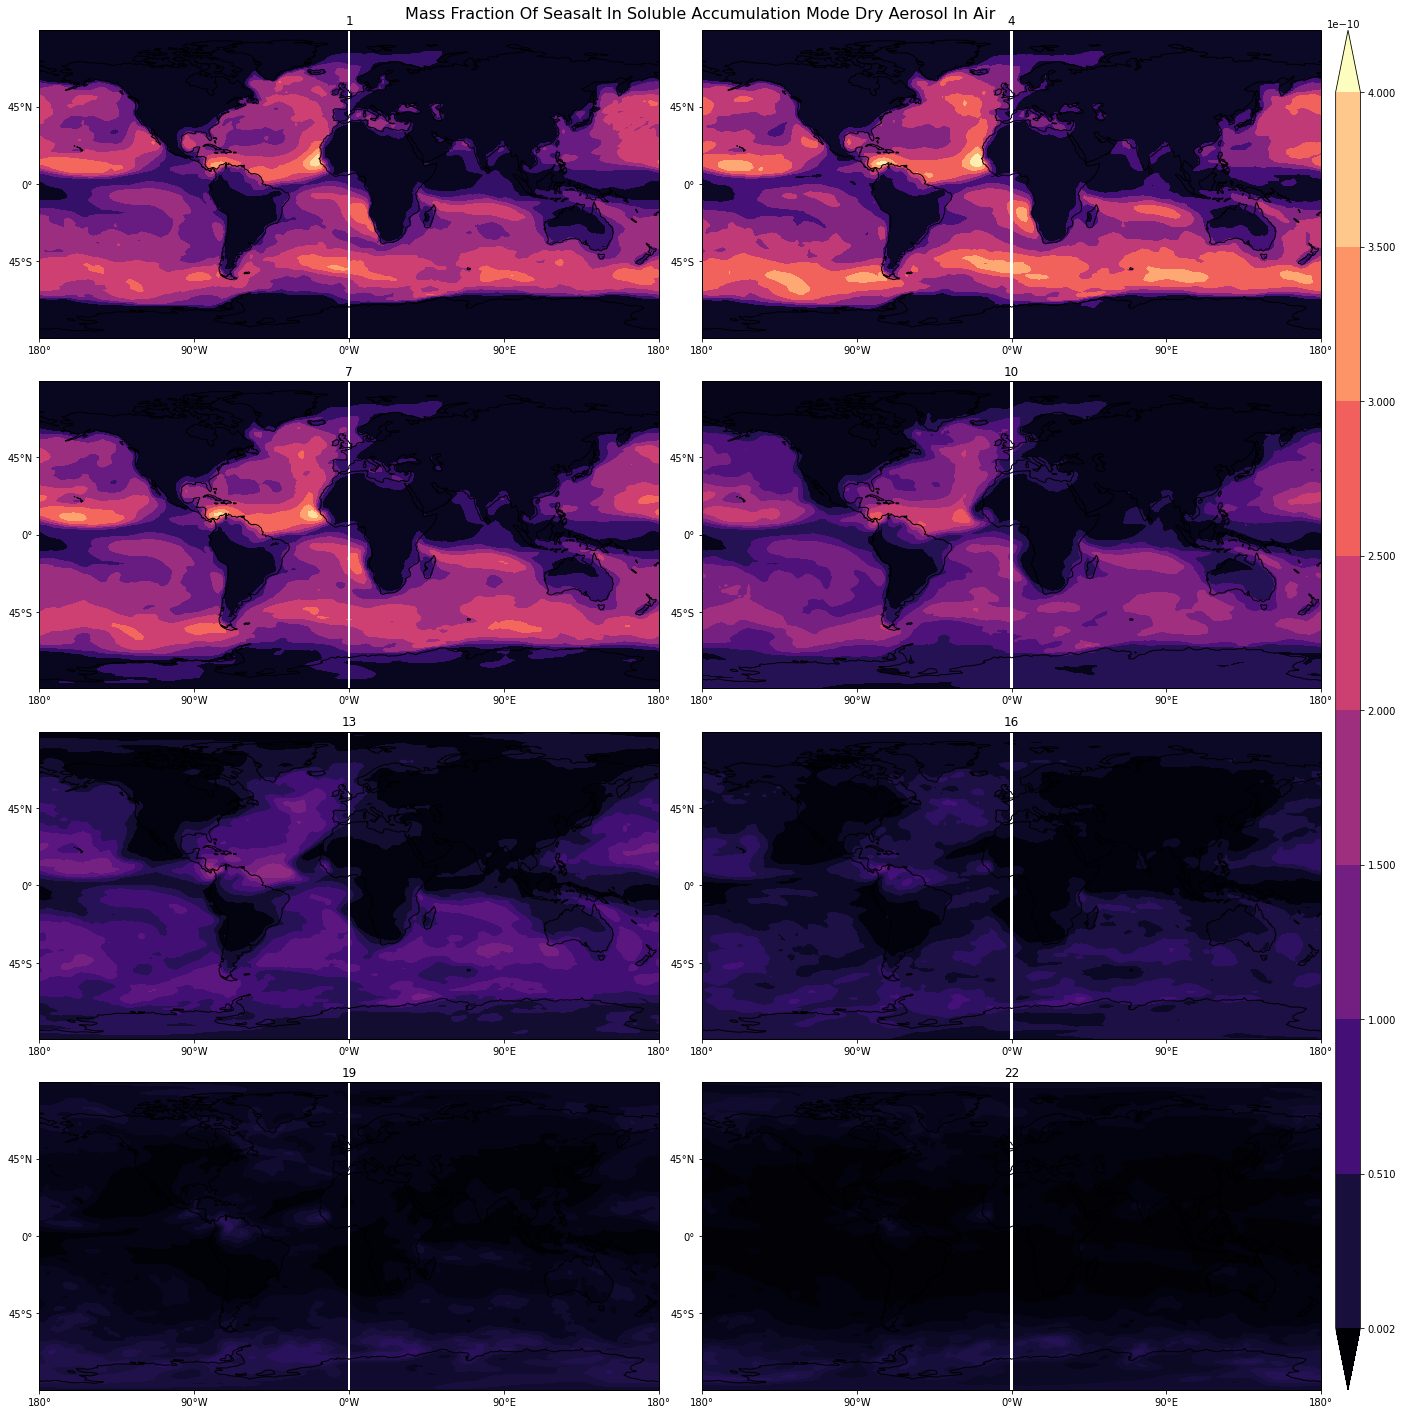

In [13]:
newcmap = 'magma'
## make the figure size larger
fs = (20,20)

dataset.singleplot(selection, cmap = newcmap, figsize=fs,t_steps=level_numbers, tname=level_name, level=ts )

## List all available colourmaps


In [14]:
import aervis.plotting.cmaps as c
print(c.colours)

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',